In [72]:
import matplotlib.pyplot as plt
import monai
import numpy as np
import torch
from monai.data import DataLoader, Dataset
from pathlib import Path
from monai.transforms.utils import allow_missing_keys_mode
from monai.transforms import BatchInverseTransform
from monai.networks.nets import DynUNet
import nibabel as nib
from tqdm import tqdm
import medpy.metric as metric
import os
import dxchange

astropy module not found


{'image': '/dtu/3d-imaging-center/courses/02510/data/Bugs/bugnist_128/BC/sfaar_16_003.tif', 'label': 'BC', 'one_hot': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}


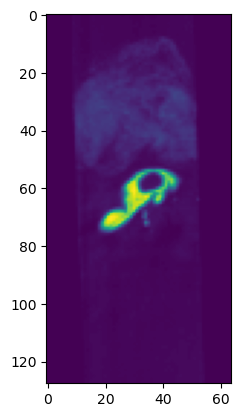

In [81]:
def getBugData(dataset_path: Path):
    dataset = []
    for idx, item in enumerate(os.listdir(dataset_path)):
        one_hot_v = np.zeros(12)
        one_hot_v[idx] = 1
        if item == "BC" or item == "BF" or item == "BL":
            for file in os.listdir(str(dataset_path) + "/"+ item):
                dataset.append({'image':str(dataset_path) + "/"+ item + "/" + file,
                                 "label": str(item),
                                 "one_hot": one_hot_v})
    return dataset

DATA_PATH = "/dtu/3d-imaging-center/courses/02510/data/Bugs/bugnist_128/"

# 1. Data. Make a 70-10-20% train-validation-test split here
Files = getBugData(dataset_path=Path(DATA_PATH))
print(Files[0])
#valFiles = getBugData(dataset_path=Path(DATA_PATH))  
#testFiles = getBugData(dataset_path=Path(DATA_PATH))

In [85]:
train_transforms = monai.transforms.Compose([
    monai.transforms.LoadImaged(keys='image'),
    monai.transforms.EnsureChannelFirstd(keys='image'),
])


BATCH_SIZE = 1
train_dataset = Dataset(data=Files, transform=train_transforms)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
#val_dataset = Dataset(data=valFiles, transform=val_transforms)
#val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)

# 2. Model. Now, use your model to do inference in a few images
for dummy_data in enumerate(train_loader):
    print(dummy_data)

RuntimeError: applying transform <monai.transforms.compose.Compose object at 0x7f378423bf50>

RuntimeError: applying transform <monai.transforms.compose.Compose object at 0x7f378799f710>